In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle

mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

In [4]:
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)
df1=et.loadDFO(datelims=(start_date,end_date))
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,1.9,NaN,None,None,NaN,mg/m^3,15.31,32.14,umol/L,29.227507,9.859421,1.883998,2015-02-11 11:04:07
1,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.6,NaN,None,None,2.57,mg/m^3,17.13,33.90,umol/L,29.484341,9.777243,6.544340,2015-02-11 11:04:07
2,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.7,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,29.484839,9.771987,6.643495,2015-02-11 11:04:07
3,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,30.144549,9.439995,10.907117,2015-02-11 11:04:07
4,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,20.62,37.65,umol/L,30.157913,9.433733,10.907117,2015-02-11 11:04:07


23.056 1.8233333333333335 57.019999999999996 8.691666666666668
Si:N est: 2.276131118716443


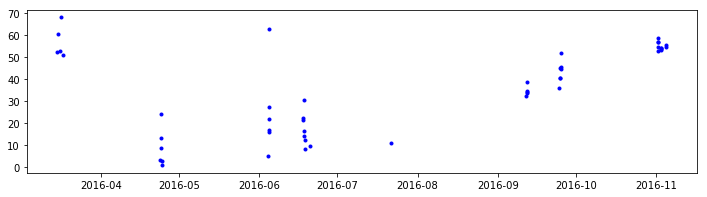

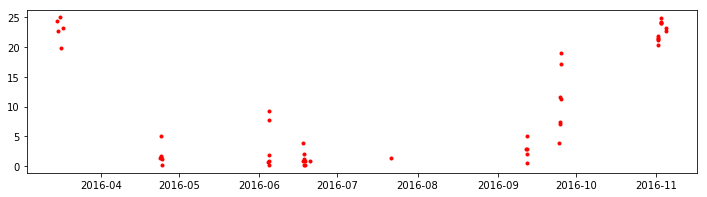

In [22]:
fig=plt.subplots(1,1,figsize=(12,3))
d15SOG=df1.loc[(df1.Lat<49.37)&(df1.Lat>48.83)&(df1.Lon>-124.21)&(df1.Year==2016)&(df1.Z<5)]
plt.plot(d15SOG['dtUTC'],d15SOG['Si'],'b.')
fig=plt.subplots(1,1,figsize=(12,3))
plt.plot(d15SOG['dtUTC'],d15SOG['N'],'r.')
N0=np.nanmean(d15SOG.loc[d15SOG.Month==3,['N']])
Si0=np.nanmean(d15SOG.loc[d15SOG.Month==3,['Si']])
N1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['N']])
Si1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['Si']])
print(N0,N1,Si0,Si1)
print('Si:N est:',(Si1-Si0)/(N1-N0))

23.056 1.8233333333333335 57.019999999999996 8.691666666666668
Si:N est: 2.276131118716443


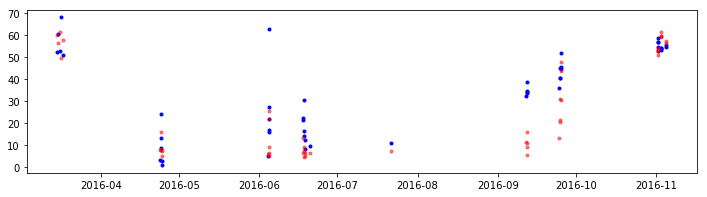

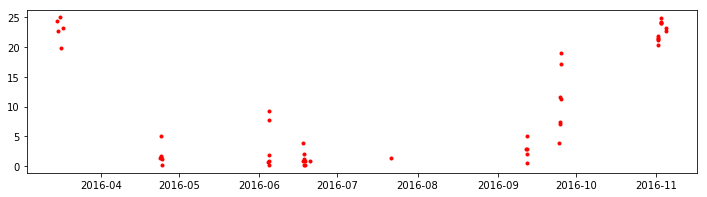

In [28]:
fig,ax1=plt.subplots(1,1,figsize=(12,3))
d15SOG=df1.loc[(df1.Lat<49.37)&(df1.Lat>48.83)&(df1.Lon>-124.21)&(df1.Year==2016)&(df1.Z<5)]
ax1.plot(d15SOG['dtUTC'],d15SOG['Si'],'b.')
fig2,ax2=plt.subplots(1,1,figsize=(12,3))
ax2.plot(d15SOG['dtUTC'],d15SOG['N'],'r.')
N0=np.nanmean(d15SOG.loc[d15SOG.Month==3,['N']])
Si0=np.nanmean(d15SOG.loc[d15SOG.Month==3,['Si']])
N1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['N']])
Si1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['Si']])
print(N0,N1,Si0,Si1)
print('Si:N est:',(Si1-Si0)/(N1-N0))
ax1.plot(d15SOG['dtUTC'],(Si1-Si0)/(N1-N0)*d15SOG['N']+(Si0-(Si1-Si0)/(N1-N0)*N0),'r.',alpha=.5)

25.905 9.885 57.958333333333336 21.998333333333335
Si:N est: 2.2446941323345815


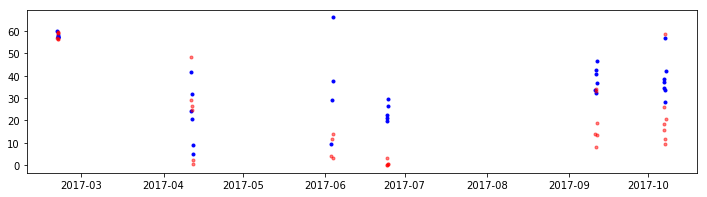

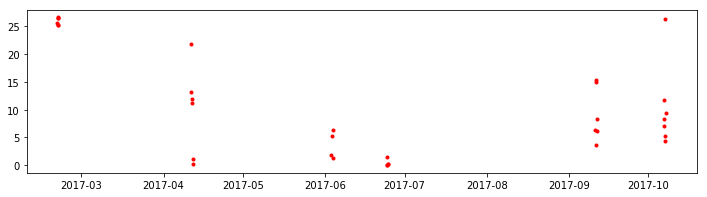

In [30]:
fig,ax1=plt.subplots(1,1,figsize=(12,3))
d15SOG=df1.loc[(df1.Lat<49.37)&(df1.Lat>48.83)&(df1.Lon>-124.21)&(df1.Year==2017)&(df1.Z<5)]
ax1.plot(d15SOG['dtUTC'],d15SOG['Si'],'b.')
fig2,ax2=plt.subplots(1,1,figsize=(12,3))
ax2.plot(d15SOG['dtUTC'],d15SOG['N'],'r.')
N0=np.nanmean(d15SOG.loc[d15SOG.Month==2,['N']])
Si0=np.nanmean(d15SOG.loc[d15SOG.Month==2,['Si']])
N1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['N']])
Si1=np.nanmean(d15SOG.loc[d15SOG.Month==4,['Si']])
print(N0,N1,Si0,Si1)
print('Si:N est:',(Si1-Si0)/(N1-N0))
ax1.plot(d15SOG['dtUTC'],(Si1-Si0)/(N1-N0)*d15SOG['N']+(Si0-(Si1-Si0)/(N1-N0)*N0),'r.',alpha=.5)

In [32]:
df2=et.loadPSF()
df2.head()

,Lat,Lon,NO23,PO4,Si,Station,Z,dtUTC,Chl,Depth_m,Phaeo
0,49.608333,-124.866667,18.65,1.459,68.43,BS1,2.0,2015-02-18 23:07:00,NaN,NaN,NaN
1,49.608333,-124.866667,26.62,2.175,55.73,BS1,20.0,2015-02-18 23:07:00,NaN,NaN,NaN
2,49.608333,-124.866667,16.25,1.809,39.14,BS1,2.0,2015-03-21 22:55:00,NaN,NaN,NaN
3,49.608333,-124.866667,16.83,2.069,39.11,BS1,20.0,2015-03-21 22:55:00,NaN,NaN,NaN
4,49.608333,-124.866667,24.27,0.551,49.90,BS1,20.0,2015-04-05 23:10:00,NaN,NaN,NaN


In [35]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

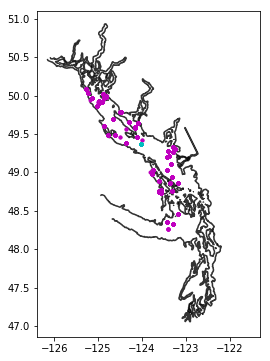

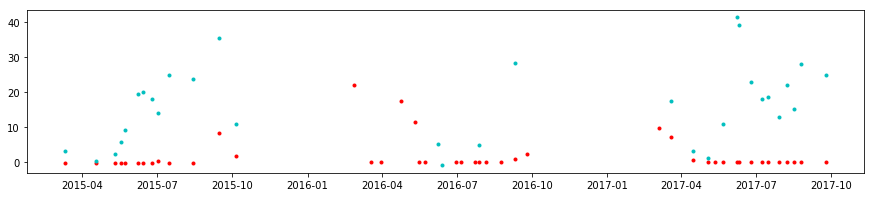

In [47]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.plot(df2['Lon'],df2['Lat'],'m.')
contour_lines = ax.contour(bathylon,bathylat,bathyZ,[0],
                colors='black',zorder=2,linewidth=.5,alpha=.8)
dfp1=df2.loc[(df2.Lat<49.4)&(df2.Lat>49.3)&(df2.Lon>-124.3)&(df2.Lon<-123.5)&(df2.Z<5)]
ax.plot(dfp1['Lon'],dfp1['Lat'],'c.')
fig2,ax2=plt.subplots(1,1,figsize=(15,3))
ax2.plot(dfp1.dtUTC,dfp1.NO23,'r.')
ax2.plot(dfp1.dtUTC,dfp1.Si,'c.')

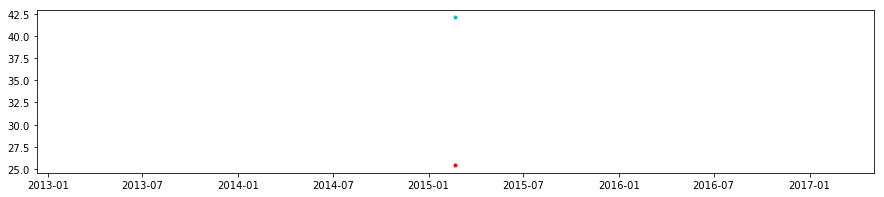

In [66]:
dfp2=df2.loc[(df2.Z<5)&(df2.dtUTC>dt.datetime(2015,2,20,19,0))&(df2.dtUTC<dt.datetime(2015,2,20,20,0))]
fig2,ax2=plt.subplots(1,1,figsize=(15,3))
ax2.plot(dfp2.dtUTC,dfp2.NO23,'r.')
ax2.plot(dfp2.dtUTC,dfp2.Si,'c.')

In [67]:
dfp2

,Lat,Lon,NO23,PO4,Si,Station,Z,dtUTC,Chl,Depth_m,Phaeo
728,48.333333,-123.3,25.37,1.803,42.17,VC3,2.0,2015-02-20 19:29:00,NaN,NaN,NaN


In [68]:
dfp3=df2.loc[(df2.Lat<48.34)&(df2.Lat>48.33)&(df2.Lon<-123.29)&(df2.Lon>-123.31)&(df2.Z<5)]

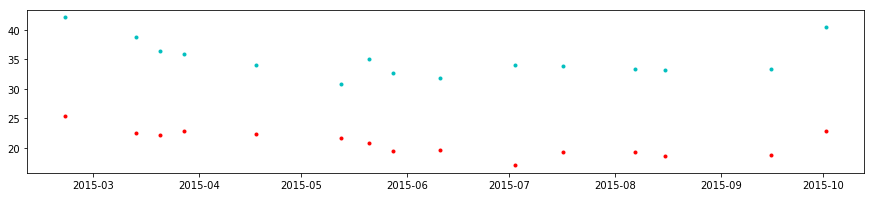

In [69]:
fig2,ax2=plt.subplots(1,1,figsize=(15,3))
ax2.plot(dfp3.dtUTC,dfp3.NO23,'r.')
ax2.plot(dfp3.dtUTC,dfp3.Si,'c.')

In [75]:
N0=dfp3.iloc[0]['NO23']
N1=dfp3.iloc[1]['NO23']
N2=dfp3.iloc[2]['NO23']

In [76]:
Si0=dfp3.iloc[0]['Si']
Si1=dfp3.iloc[1]['Si']
Si2=dfp3.iloc[2]['Si']

In [77]:
print((Si1-Si0)/(N1-N0),(Si2-Si0)/(N2-N0))

1.114864864864866 1.7476923076923077


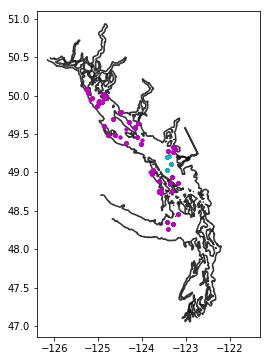

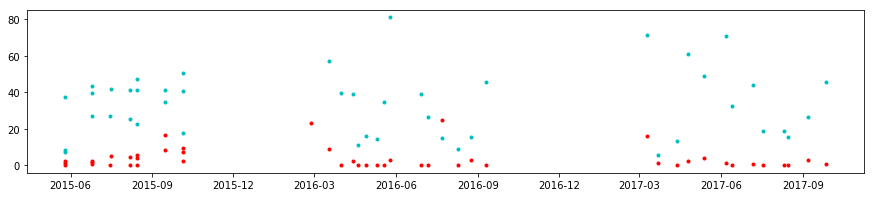

In [91]:
dfp4=df2.loc[(df2.Lat<49.25)&(df2.Lat>49.0)&(df2.Lon>-123.7)&(df2.Z<5)]

fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.plot(df2['Lon'],df2['Lat'],'m.')
contour_lines = ax.contour(bathylon,bathylat,bathyZ,[0],
                colors='black',zorder=2,linewidth=.5,alpha=.8)
ax.plot(dfp4['Lon'],dfp4['Lat'],'c.')
fig2,ax2=plt.subplots(1,1,figsize=(15,3))
ax2.plot(dfp4.dtUTC,dfp4.NO23,'r.')
ax2.plot(dfp4.dtUTC,dfp4.Si,'c.')